In [21]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image

In [28]:
train_data_dir = '/kaggle/input/dogs-cats-images/'
test_data_dir = '/kaggle/input/dogs-cats-images/'

In [12]:
img_width, img_height = 150, 150
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height),
                                                    batch_size=batch_size, class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=(img_width, img_height),
                                                  batch_size=batch_size, class_mode='binary')

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size,
                    epochs=10, validation_data=test_generator,
                    validation_steps=test_generator.samples // batch_size)

Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Epoch 1/10
625/625 [==============================] - 276s 432ms/step - loss: 0.6952 - accuracy: 0.5039 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
625/625 [==============================] - 203s 325ms/step - loss: 0.6932 - accuracy: 0.4972 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
625/625 [==============================] - 196s 313ms/step - loss: 0.6932 - accuracy: 0.4980 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
625/625 [==============================] - 196s 313ms/step - loss: 0.6933 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
625/625 [==============================] - 198s 317ms/step - loss: 0.6933 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
625/625 [==============================] - 195s 312ms/step - loss: 0.6932 - accuracy: 0.4952 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
625/625 [==================

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [17]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

625/625 [==============================] - 66s 106ms/step - loss: 0.6932 - accuracy: 0.5000
Test Accuracy: 50.00%


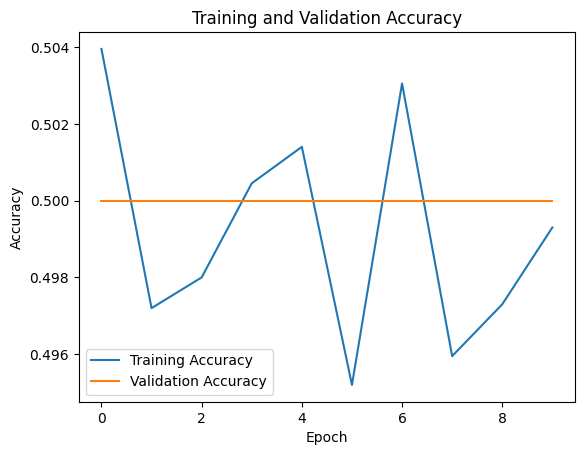

In [18]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
def testing_image(image_directory):
    test_image = image.load_img(image_directory, target_size = (150, 150))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(x = test_image)
    print(result)
    if result[0][0]  == 1:
        prediction = 'Dog'
    else:
        prediction = 'Cat'
    return prediction

In [38]:
print(testing_image(test_data_dir + '/dataset/test_set/cats/cat.4005.jpg'))

1/1 [==============================] - 0s 19ms/step
[[0.51157576]]
Cat
